### kNN Algorithm

In [13]:
import numpy as np
import math
import operator #in order to sort python dictionary by values

class PreProcessing(object):
    
    def readData(self, filepath):
        with open(filepath) as fp:
            for i, line in enumerate(fp):
                x = line.split(",")
                x = np.array(x).reshape((1,5))

                if i==0: #Bir dahakine önce list append yap en son list to numpy array yap.
                    data = x
                else:
                    data = np.concatenate((data,x),axis=0)       

        print("Number of samples: ",data.shape[0])  
        
        return data
        
    def split_X_Y(self,data):
        numberOfFeatures = data.shape[1]-1
        numberOfSamples = data.shape[0]
        x = data[:,0:numberOfFeatures].reshape((numberOfSamples,numberOfFeatures))
        y = data[:,-1].reshape((numberOfSamples,1))
        print("X Shape: ", x.shape)
        print("Y Shape: ", y.shape)
        
        return x,y
        
    def split_Train_Test(self,x,y): #This function must be changed according to data.
        train1 = x[0:30,:]
        test1 = x[30:50,:]
        train2 = x[50:80,:]
        test2 = x[80:100,:]
        train3 = x[100:130,:]
        test3 = x[130:150,:]
        x_train = np.concatenate((train1,train2,train3),axis=0)
        x_test = np.concatenate((test1,test2,test3),axis=0)
        print("X Train Shape: ",x_train.shape,"\nX Test Shape: ",x_test.shape)
        
        train1 = y[0:30,:]
        test1 = y[30:50,:]
        train2 = y[50:80,:]
        test2 = y[80:100,:]
        train3 = y[100:130,:]
        test3 = y[130:150,:]
        y_train = np.concatenate((train1,train2,train3),axis=0)
        y_test = np.concatenate((test1,test2,test3),axis=0)
        print("Y Train Shape: ",y_train.shape,"\nY Test Shape: ",y_test.shape)
        
        return x_train, y_train, x_test, y_test
        
    def createLabels(self): #This function must be changed according to data.
        zero = np.zeros((50,1))
        one = np.ones((50,1))
        two = np.ones((50,1))
        for i in range(50):
            two[i] = 2
        y= np.concatenate((zero,one,two),axis=0)    
        return y
        
            
#**********************************************************************************   
class kNN(object):
    
    def __init__(self, k, distanceType):
        self.k = k
        self.distance = distanceType
        
        
        
    def euclideanDistance(self,sample1,sample2):
        sum = 0
        for i in range(sample1.shape[0]):
            number = sample1[i]-sample2[i]
            sum = sum + math.pow(number,2)
            
        return math.pow(sum,0.5)
    
    def manhattanDistance(self,sample1,sample2):
        sum = 0
        for i in range(sample1.shape[0]):
            number = abs(sample1[i]-sample2[i])
            sum = sum + number
            
        return sum
    
      
    
    def fit(self, x_train, y_train, x_test, y_test):
        
        predictions = np.zeros((x_test.shape[0],1))
        
        for i in range(x_test.shape[0]): 
            
            distances = {}
            
            for j in range(x_train.shape[0]): 
                
                if self.distance == "Euclid":
                    distance = self.euclideanDistance(x_test[i],x_train[j])
                if self.distance == "Manhattan":
                    distance = self.manhattanDistance(x_test[i],x_train[j])
                    
                    
                    
                id = str(j)
                distances[id] = distance #adding distances into dictionary
                
            sorted_distances = sorted(distances.items(), key=operator.itemgetter(1)) #sorting by value, dictionary => list obj.
            k_distances_ids = sorted_distances[0:self.k] #detecting k distances and ids
            
            classes = []
            
            for p, id_and_distance in enumerate(k_distances_ids):
        
                id = int(id_and_distance[0])
                distance = id_and_distance[1]
                classes.append(np.asscalar(y_train[id])) 
                
            
            frequent_class = max(set(classes), key=classes.count) #find the most frequent class, 
            #print("Tahmin", frequent_class)
            predictions[i] = frequent_class
    
        
        """for i in range(60):
            print("Real Value: ", y_test[i]," Prediction: ", predictions[i])"""
        
        print("Test Accuracy: {}% with k = {} distance type = {}".format((100 - np.mean(np.abs(predictions - y_test)) * 100),self.k,self.distance))
        
        
        #error detection
        predictions = [np.asscalar(value) for value in predictions]
        y_test = [np.asscalar(value) for value in y_test]
        errors = np.array(predictions)-np.array(y_test)
        errors = list(errors) #converting list because of count() func.
        print("Error Count: ",errors.count(-1))
        
        
        
        
        return predictions
        
        
        
    def predict(self, x_train, y_train, x_test):
        
        print("k = ",self.k," distance = ",self.distance)
        
        predictions = np.zeros((x_test.shape[0],1))
        
        for i in range(x_test.shape[0]): 
            
            distances = {}
            
            for j in range(x_train.shape[0]): 
                
                if self.distance == "Euclid":
                    distance = self.euclideanDistance(x_test[i],x_train[j])
                    
                if self.distance == "Manhattan":
                    distance = self.manhattanDistance(x_test[i],x_train[j])
                    
                    
                id = str(j)
                distances[id] = distance #adding distances into dictionary
                
            sorted_distances = sorted(distances.items(), key=operator.itemgetter(1)) #sorting by value, dictionary => list obj.
            k_distances_ids = sorted_distances[0:self.k] #detecting k distances and ids
            
            classes = []
            
            for p, id_and_distance in enumerate(k_distances_ids):
        
                id = int(id_and_distance[0])
                distance = id_and_distance[1]
                classes.append(np.asscalar(y_train[id])) 
                
            
            frequent_class = max(set(classes), key=classes.count) #find the most frequent class, 
            #print("Tahmin", frequent_class)
            predictions[i] = frequent_class
    
    
        return predictions
        
        

#MAIN****************************************************************************

preprocessing = PreProcessing()
#Data Preprocessing
filepath = 'iris.txt'
data = preprocessing.readData(filepath)
x, y = preprocessing.split_X_Y(data)
x = np.float32(x)
#select only first and forth features
feature1 = x[:,0].reshape((x.shape[0],1))
feature2 = x[:,3].reshape((x.shape[0],1))
x = np.concatenate((feature1,feature2),axis=1)

y = preprocessing.createLabels() #convert string into int
x_train, y_train, x_test, y_test = preprocessing.split_Train_Test(x,y)

print("***********************************************************************")


#kNN Algorithm
for i in range(90):
    
    k = i+1
    if k%2==1:
        distanceType = "Euclid"
        model = kNN(k, distanceType)
        predictions = model.fit(x_train, y_train, x_test, y_test)
    


        




Number of samples:  150
X Shape:  (150, 4)
Y Shape:  (150, 1)
X Train Shape:  (90, 2) 
X Test Shape:  (60, 2)
Y Train Shape:  (90, 1) 
Y Test Shape:  (60, 1)
***********************************************************************
Test Accuracy: 93.33333333333333% with k = 1 distance type = Euclid
Error Count:  4
Test Accuracy: 96.66666666666667% with k = 3 distance type = Euclid
Error Count:  2
Test Accuracy: 96.66666666666667% with k = 5 distance type = Euclid
Error Count:  2
Test Accuracy: 96.66666666666667% with k = 7 distance type = Euclid
Error Count:  2
Test Accuracy: 96.66666666666667% with k = 9 distance type = Euclid
Error Count:  2
Test Accuracy: 96.66666666666667% with k = 11 distance type = Euclid
Error Count:  2
Test Accuracy: 96.66666666666667% with k = 13 distance type = Euclid
Error Count:  2
Test Accuracy: 95.0% with k = 15 distance type = Euclid
Error Count:  3
Test Accuracy: 96.66666666666667% with k = 17 distance type = Euclid
Error Count:  2
Test Accuracy: 93.33333

### Visualizing the Data

No handles with labels found to put in legend.


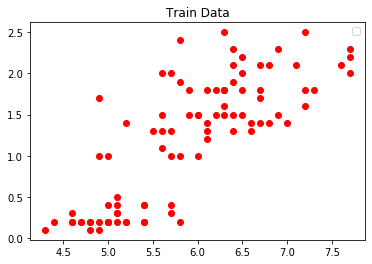

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

feature1 = x_train[:,0].reshape((90,1))
feature2 = x_train[:,1].reshape((90,1))

fig, ax = plt.subplots()
ax.plot(feature1, feature2, 'ro' ) 
#ax.plot(centers_Feature1, centers_Feature2, 'bo' ) 
ax.set_title("Train Data")
ax.legend();




# Bonus 1 - Finding Decision Boundaries

No handles with labels found to put in legend.


Minimum and maximum value of feature1:  [4.3] [7.7]
Minimum and maximum value of feature2:  [0.1] [2.5]
x_data shape:  (10000, 2)


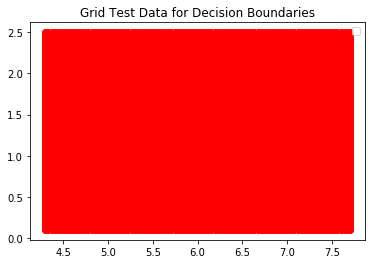

In [15]:
min_f1 = min(feature1)
min_f2 = min(feature2)
max_f1 = max(feature1)
max_f2 = max(feature2)

print("Minimum and maximum value of feature1: ",min_f1,max_f1)
print("Minimum and maximum value of feature2: ",min_f2,max_f2)

f1 = np.linspace(min_f1,max_f1, 100)
f2 = np.linspace(min_f2,max_f2, 100)

x_data = []
sample = []

for i in range(100): #run over x axis
    for j in range(100):  #run over y axis
        sample = [np.asscalar(f1[i]),np.asscalar(f2[j])]
        x_data.append(sample)
    
x_data = np.array(x_data)


f1 = x_data[:,0]
f2 = x_data[:,1]

fig, ax = plt.subplots()
ax.plot(f1, f2, 'ro' ) 
#ax.plot(centers_Feature1, centers_Feature2, 'bo' ) 
ax.set_title("Grid Test Data for Decision Boundaries")
ax.legend();

print("x_data shape: ",x_data.shape)

k =  1  distance =  Manhattan


No handles with labels found to put in legend.


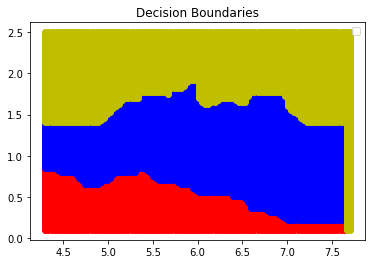

In [7]:
#Prediction for decision boundaries
model = kNN(1, "Manhattan")
predictions = model.predict(x_train, y_train, x_data)

class0 = []
class1 = []
class2 = []

for i in range(predictions.shape[0]):
    
    if np.asscalar(predictions[i])==0:
        class0.append(x_data[i])
        
    if np.asscalar(predictions[i])==1:
        class1.append(x_data[i])
        
    if np.asscalar(predictions[i])==2:
        class2.append(x_data[i])
        
class0 = np.array(class0)
class1 = np.array(class1)
class2 = np.array(class2)

f1_c0 = class0[:,0]
f2_c0 = class0[:,1]
f1_c1 = class1[:,0]
f2_c1 = class1[:,1]
f1_c2 = class2[:,0]
f2_c2 = class2[:,1]

fig, ax = plt.subplots()
ax.plot(f1_c0, f2_c0, 'ro' ) 
ax.plot(f1_c1, f2_c1, 'bo' ) 
ax.plot(f1_c2, f2_c2, 'yo' ) 
ax.set_title("Decision Boundaries")
ax.legend();


### Bonus 2 - Sckit Learn Implementation of k-NN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(15):
    
    k = i+1
    if k%2==1:
        distanceType =  "manhattan" #"euclidean"
        
        
        neigh = KNeighborsClassifier(n_neighbors=k,metric=distanceType)
        neigh.fit(x_train, y_train)
        
        predictions = neigh.predict(x_test).reshape((60,1))
        y_test = y_test.reshape((60,1))
        
        #Accuracy
        accuracy = (100 - np.mean(np.abs(predictions - y_test)) * 100)
        print("Accuracy: ", accuracy," with k: ",k," Distance metric: ", distanceType)
        
        
        #error detection
        predictions2 = [np.asscalar(value) for value in predictions]
        y_test2 = [np.asscalar(value) for value in y_test]
        errors = np.array(predictions)-np.array(y_test)
        errors = list(errors) #converting list because of count() func.
        print("Error Count: ",errors.count(-1))
        print("*****************************************************************")
    
    
        
        


Accuracy:  93.33333333333333  with k:  1  Distance metric:  manhattan
Error Count:  4
*****************************************************************
Accuracy:  96.66666666666667  with k:  3  Distance metric:  manhattan
Error Count:  2
*****************************************************************
Accuracy:  96.66666666666667  with k:  5  Distance metric:  manhattan
Error Count:  2
*****************************************************************
Accuracy:  96.66666666666667  with k:  7  Distance metric:  manhattan
Error Count:  2
*****************************************************************
Accuracy:  96.66666666666667  with k:  9  Distance metric:  manhattan
Error Count:  2
*****************************************************************
Accuracy:  95.0  with k:  11  Distance metric:  manhattan
Error Count:  3
*****************************************************************
Accuracy:  95.0  with k:  13  Distance metric:  manhattan
Error Count:  3
**************************

E:\PROGRAM FILES\Anaconda\envs\staj_projesi\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
E:\PROGRAM FILES\Anaconda\envs\staj_projesi\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
E:\PROGRAM FILES\Anaconda\envs\staj_projesi\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
E:\PROGRAM FILES\Anaconda\envs\staj_projesi\lib\site-packages\ipykernel_launcher.py:11: DataCo

E:\PROGRAM FILES\Anaconda\envs\staj_projesi\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
No handles with labels found to put in legend.


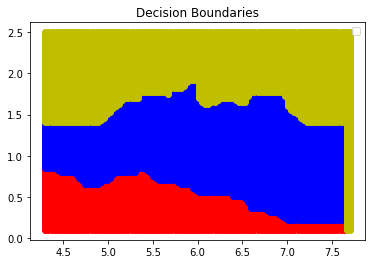

In [20]:
#Prediction for decision boundaries
distanceType =  "manhattan"  #euclidean
k=1

neigh = KNeighborsClassifier(n_neighbors=k,metric=distanceType)
neigh.fit(x_train, y_train)
        
predictions = neigh.predict(x_data)

class0 = []
class1 = []
class2 = []

for i in range(predictions.shape[0]):
    
    if np.asscalar(predictions[i])==0:
        class0.append(x_data[i])
        
    if np.asscalar(predictions[i])==1:
        class1.append(x_data[i])
        
    if np.asscalar(predictions[i])==2:
        class2.append(x_data[i])
        
class0 = np.array(class0)
class1 = np.array(class1)
class2 = np.array(class2)

f1_c0 = class0[:,0]
f2_c0 = class0[:,1]
f1_c1 = class1[:,0]
f2_c1 = class1[:,1]
f1_c2 = class2[:,0]
f2_c2 = class2[:,1]

fig, ax = plt.subplots()
ax.plot(f1_c0, f2_c0, 'ro' ) 
ax.plot(f1_c1, f2_c1, 'bo' ) 
ax.plot(f1_c2, f2_c2, 'yo' ) 
ax.set_title("Decision Boundaries")
ax.legend();